# Results Graph

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../results.csv")
df.head()

,filename,cpu_time,gpu_time,paper_words,summary_words,paper_tokens,summary_tokens
0,10005108.pdf,862.941496,81.545959,5526,1065,7979,1419
1,10018187.pdf,640.792135,57.350133,3447,696,5238,903
2,10032547.pdf,1018.389729,116.332956,7301,1421,11011,1935
3,10044683.pdf,1213.012650,135.636299,8283,1719,11545,2064
4,10054384.pdf,926.543849,89.109272,5205,1097,7761,1419


## Paper Words vs Summary Words

C:\Users\mohit\AppData\Local\Temp\ipykernel_21544\3732975889.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = df[["filename","paper_words","summary_words"]].groupby(df.index // group_rows).mean()  # Grouping every 10 rows and taking the mean


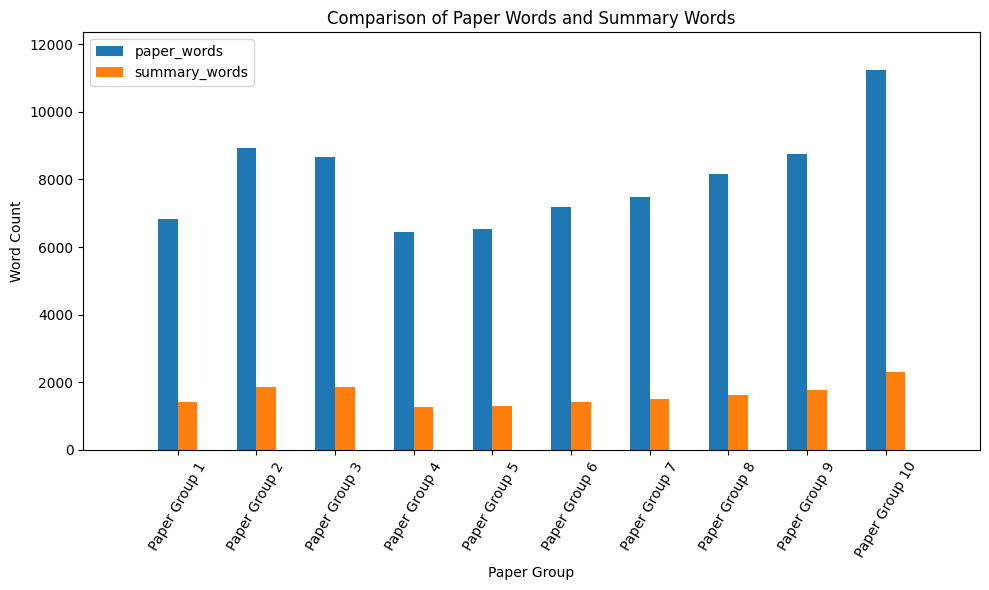

In [2]:
group_rows = 10
aggregated_data = df[["filename","paper_words","summary_words"]].groupby(df.index // group_rows).mean()  # Grouping every 10 rows and taking the mean

# Plotting the comparison using a horizontal bar chart
aggregated_data.plot(kind='bar', figsize=(10,6))
plt.xlabel('Paper Group')
plt.xticks(aggregated_data.index,["Paper Group {}".format(i) for i in range(1,group_rows+1)],rotation=60)
plt.ylabel('Word Count')
plt.title('Comparison of Paper Words and Summary Words')
plt.tight_layout() 
plt.margins(0.1)  # Adjust margins if necessary
plt.autoscale()  # Ensure proper scaling
plt.savefig("../Images/Word Comparision.png",dpi=300)
plt.show()

## Cpu Time and Gpu Time

### CPU and GPU Specs

* CPU : 12th Gen Intel(R) Core(TM) i7-1255U   1.70 GHz
* GPU : Nvidia P100

In [3]:
print("Average Time to Process file on CPU : {} Seconds".format( round(df["cpu_time"].mean(),2) ) )
print("Average Time to Process file on GPU : {} Seconds".format( round(df["gpu_time"].mean(),2) ) )

Average Time to Process file on CPU : 1622.74 Seconds
Average Time to Process file on GPU : 128.71 Seconds


In [4]:
df["cpu_time_per_thousand_words"] = df["cpu_time"] /  df["paper_words"] * 1000 
df["gpu_time_per_thousand_words"] = df["gpu_time"] /  df["paper_words"] * 1000
print("Average Time to Process on CPU / 1000 Words : {} Seconds".format( round(df["cpu_time_per_thousand_words"].mean(),2) ) )
print("Average Time to Process on GPU / 1000 Words : {} Seconds".format( round(df["gpu_time_per_thousand_words"].mean(),2) ) )

Average Time to Process on CPU / 1000 Words : 209.02 Seconds
Average Time to Process on GPU / 1000 Words : 17.17 Seconds


In [5]:
df["word_to_token_increase"] = df["paper_tokens"] - df["paper_words"] / df["paper_words"] * 100
print("Average Increase from Word count to Token Count : {}".format( round(df["word_to_token_increase"].mean(),2) ) )

Average Increase from Word count to Token Count : 11672.43


In [6]:
df["cpu_time_per_thousand_tokens"] = df["cpu_time"] /  df["paper_tokens"] * 1000 
df["gpu_time_per_thousand_tokens"] = df["gpu_time"] /  df["paper_tokens"] * 1000
print("Average Time to Process on CPU / 1000 Tokens : {} Seconds".format( round(df["cpu_time_per_thousand_tokens"].mean(),2) ) )
print("Average Time to Process on GPU / 1000 Tokens : {} Seconds".format( round(df["gpu_time_per_thousand_tokens"].mean(),2) ) )

Average Time to Process on CPU / 1000 Tokens : 141.9 Seconds
Average Time to Process on GPU / 1000 Tokens : 11.62 Seconds


In [7]:
df["reduction_percent"] = df["summary_words"] / df["paper_words"] * 100
print("Average Reduction in Paper Length : {}%".format( round(df["reduction_percent"].mean(),2) ) )

Average Reduction in Paper Length : 20.21%
